In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import grangercausalitytests
import warnings
warnings.filterwarnings('ignore')


In [53]:
raw_data = pd.read_excel('Data/Data_weekly_raw.xlsx')
raw_data['Date'] = pd.to_datetime(raw_data.Date)
raw_data.set_index('Date', inplace=True)
raw_data = raw_data.fillna(method='ffill')

raw_data['^N225'].fillna(raw_data['^N225'].mean(), inplace=True)
raw_data['PL=F'].fillna(raw_data['PL=F'].mean(), inplace=True)


df = pd.DataFrame(raw_data.pct_change().dropna())
df.dropna(inplace=True)

In [54]:
train_period = '2018-07-30'
df = df.loc[:train_period]

In [55]:
ticker_to_name = {
    '000001.SS': 'Shanghai SSE Composite',
    '^DJI': 'Dow Jones',
    '^N225': 'Nikkei 225',
    '^NSEI': 'NSE India',
    '^SPX': 'S&P 500',
    '^STOXX': 'STOXX 600',
    'EXV5.DE': 'Automotive Industry Index',
    'ITA': 'Aerospace US',
    'ITB': 'Home Construction',
    'SHV': '1-3 Year Treasury ETF',
    'TLT': '20+ Year Bond ETF',
    'CNY=X': 'USD/CNY',
    'DX-Y.NYB': 'US Dollar Index',
    'EUR=X': 'USD/EUR',
    'CL=F': 'Crude Oil',
    'GC=F': 'Gold',
    'HG=F': 'Copper',
    'NG=F': 'Natural Gas',
    'PL=F': 'Platinum',
    'HRC=F': 'Hot Rolled Coil Steel Futures'
}

df = df.rename(columns=ticker_to_name)

In [56]:
max_lag = 5
test = []

for i in df:
    for j in df:
        result = grangercausalitytests(df[[i, j]], max_lag, verbose=False)
        p_value = result[max_lag][0]['ssr_ftest'][1]
        test.append(p_value)

In [57]:
p_value_matrix = np.array(test).reshape(20, 20).T
p_value_df = pd.DataFrame(p_value_matrix, index=df.columns, columns=df.columns)

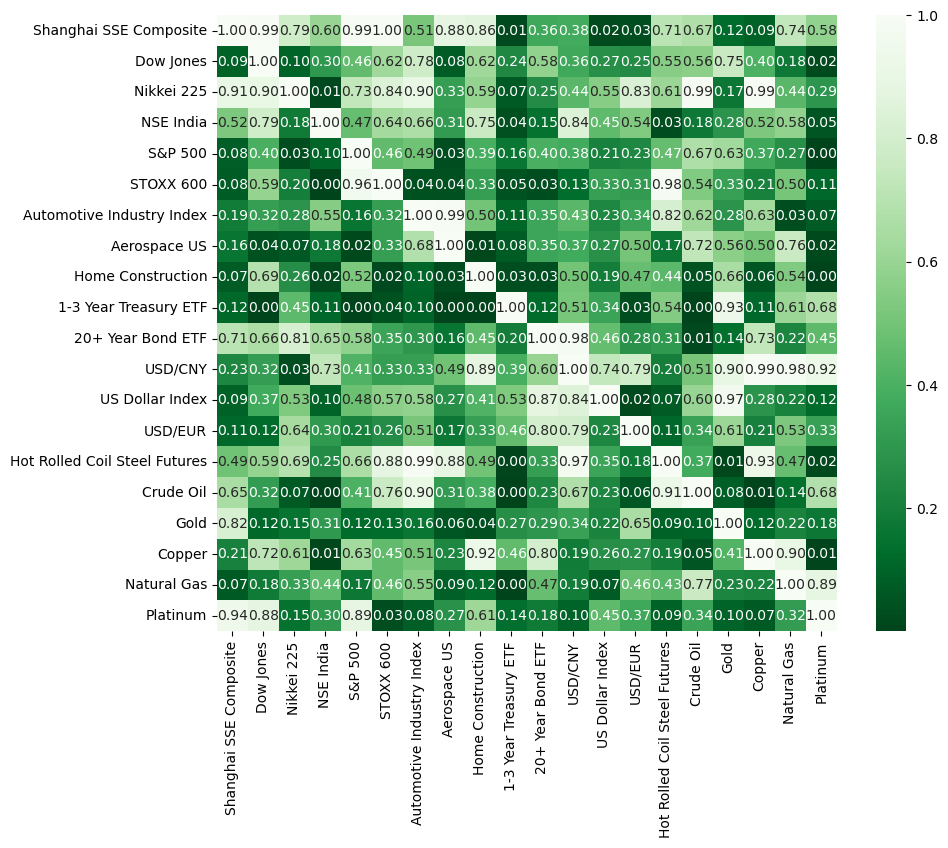

In [58]:
plt.figure(figsize=(10,8))
heatmap = sns.heatmap(p_value_df, annot=True, cmap='Greens_r', center=0.5,  fmt='.2f')
heatmap.set_yticklabels(heatmap.get_yticklabels(), rotation=0)
plt.show()